In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import re


In [2]:
df = pd.read_excel("IAHTerminalA__210704_023056.xlsx", sheet_name="AHU Areas")

In [3]:
df.head(10)

,Building Name,Floor Name,AHU Area Name,Floor Area (ft²),Interior Zone Percentage (%),Perimeter Length (ft),Floor Height (ft),Perimeter Area (ft²)
0,IAH Terminal A,Level1,Near CVSKiosk-RestRoom,1690.362533,NaN,0.000000,15,0.000000
1,IAH Terminal A,Level1,Arr Bug Claim-Arr_BC,44948.973085,NaN,13.211227,15,198.168411
2,IAH Terminal A,Level1,NearBagServ-Serv,1693.513530,NaN,0.000000,15,0.000000
3,IAH Terminal A,Level1,NearAmericanAir-Serv,11256.618860,NaN,70.827816,15,1062.417238
4,IAH Terminal A,Level1,NearBagServ2-Serv,2446.043337,NaN,40.685446,15,610.281688
5,IAH Terminal A,Level1,HAS-Off,1813.269431,NaN,0.000000,15,0.000000
6,IAH Terminal A,Level1,NearHAS-Serv,12402.859813,NaN,0.000000,15,0.000000
7,IAH Terminal A,Level1,NewSParking-Off,160.287733,NaN,0.000000,15,0.000000
8,IAH Terminal A,Level1,NearSParking-Serv,12555.316089,NaN,0.000000,15,0.000000
9,IAH Terminal A,Level1,Arr bug Claim-Arr_BC,8546.177065,NaN,26.830573,15,402.458599


In [4]:
df.tail()

,Building Name,Floor Name,AHU Area Name,Floor Area (ft²),Interior Zone Percentage (%),Perimeter Length (ft),Floor Height (ft),Perimeter Area (ft²)
82,IAH Terminal A,Level2,NearCityPoint-Serv-S,407.453658,NaN,0.000000,15,0.000000
83,IAH Terminal A,Level2,NearCadillacMex-Serv-S,1460.405167,NaN,23.499512,15,352.492679
84,IAH Terminal A,Level2,A17A20-Trans-S,40489.567138,NaN,266.709986,15,4000.649786
85,IAH Terminal A,Level2,A25A30-Trans-S,24389.847590,NaN,264.295226,15,3964.428391
86,IAH Terminal A,Level2,A30-Trans-S,2968.028207,NaN,154.284150,15,2314.262250


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Floor Area (ft²),87.0,4725.134502,9255.796433,153.601434,622.741803,1253.098501,3306.964203,49743.702254
Interior Zone Percentage (%),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Perimeter Length (ft),87.0,23.601589,60.521142,0.000000,0.000000,0.000000,2.439595,336.229511
Floor Height (ft),87.0,15.000000,0.000000,15.000000,15.000000,15.000000,15.000000,15.000000
Perimeter Area (ft²),87.0,354.023837,907.817125,0.000000,0.000000,0.000000,36.593932,5043.442666


In [6]:
df.columns

Index(['Building Name', 'Floor Name', 'AHU Area Name', 'Floor Area (ft²)',
       'Interior Zone Percentage (%)', 'Perimeter Length (ft)',
       'Floor Height (ft)', 'Perimeter Area (ft²)'],
      dtype='object')

In [7]:
df.shape

(87, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 8 columns):
Building Name                   87 non-null object
Floor Name                      87 non-null object
AHU Area Name                   87 non-null object
Floor Area (ft²)                87 non-null float64
Interior Zone Percentage (%)    0 non-null float64
Perimeter Length (ft)           87 non-null float64
Floor Height (ft)               87 non-null int64
Perimeter Area (ft²)            87 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 5.6+ KB


In [9]:
df.isnull()

,Building Name,Floor Name,AHU Area Name,Floor Area (ft²),Interior Zone Percentage (%),Perimeter Length (ft),Floor Height (ft),Perimeter Area (ft²)
0,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
82,False,False,False,False,True,False,False,False
83,False,False,False,False,True,False,False,False
84,False,False,False,False,True,False,False,False
85,False,False,False,False,True,False,False,False


In [10]:
df["Floor Area (ft²)"].describe()

count       87.000000
mean      4725.134502
std       9255.796433
min        153.601434
25%        622.741803
50%       1253.098501
75%       3306.964203
max      49743.702254
Name: Floor Area (ft²), dtype: float64

In [ ]:
df[df["Floor Name"]=="Level1"].head(10)

In [11]:
df1 = df[df['AHU Area Name'].str.contains('Serv', regex=False, case=False, na=False)]
df1

,Building Name,Floor Name,AHU Area Name,Floor Area (ft²),Interior Zone Percentage (%),Perimeter Length (ft),Floor Height (ft),Perimeter Area (ft²)
2,IAH Terminal A,Level1,NearBagServ-Serv,1693.513530,NaN,0.000000,15,0.000000
3,IAH Terminal A,Level1,NearAmericanAir-Serv,11256.618860,NaN,70.827816,15,1062.417238
4,IAH Terminal A,Level1,NearBagServ2-Serv,2446.043337,NaN,40.685446,15,610.281688
6,IAH Terminal A,Level1,NearHAS-Serv,12402.859813,NaN,0.000000,15,0.000000
8,IAH Terminal A,Level1,NearSParking-Serv,12555.316089,NaN,0.000000,15,0.000000
13,IAH Terminal A,Level2,NearRest2.1-Serv-N,558.923659,NaN,0.000000,15,0.000000
14,IAH Terminal A,Level2,NearRest2.2-Serv-N,280.881502,NaN,0.000000,15,0.000000
16,IAH Terminal A,Level2,NearA12-Serv-N,917.928262,NaN,0.000000,15,0.000000
18,IAH Terminal A,Level2,NearUtdClub-Serv-N,2777.127982,NaN,0.000000,15,0.000000
22,IAH Terminal A,Level2,NearStarbucks-Serv-N,3146.739426,NaN,2.070830,15,31.062447


In [12]:
total_floor_area_server_rooms = df1["Floor Area (ft²)"].sum()
total_floor_area_server_rooms

113459.55167889904

In [13]:
df2 = df[df["AHU Area Name"].str.contains("RestRoom", regex=False, case=False, na=False)]
df2

,Building Name,Floor Name,AHU Area Name,Floor Area (ft²),Interior Zone Percentage (%),Perimeter Length (ft),Floor Height (ft),Perimeter Area (ft²)
0,IAH Terminal A,Level1,Near CVSKiosk-RestRoom,1690.362533,NaN,0.0,15,0.0
11,IAH Terminal A,Level2,A15-RestRoom-N,537.923523,NaN,0.0,15,0.0
12,IAH Terminal A,Level2,A15-RestRoom-N,585.849865,NaN,0.0,15,0.0
19,IAH Terminal A,Level2,A8-RestRoom-N,1204.267156,NaN,0.0,15,0.0
23,IAH Terminal A,Level2,MothersRooms-RestRoom-N,625.683514,NaN,0.0,15,0.0
26,IAH Terminal A,Level2,A2-RestRoom-N,880.970425,NaN,0.0,15,0.0
27,IAH Terminal A,Level2,NearA2RestRoom-Serv-N,896.006373,NaN,0.0,15,0.0
33,IAH Terminal A,Level2,JackInBox-RestRoom-N,1036.698677,NaN,0.0,15,0.0
41,IAH Terminal A,Level2,Delta-RestRoom-S,343.242605,NaN,0.0,15,0.0
44,IAH Terminal A,Level2,American-RestRoom-S,350.179618,NaN,0.0,15,0.0


In [14]:
total_area_restrooms = df2["Floor Area (ft²)"].sum()
total_area_restrooms

12545.17017426094

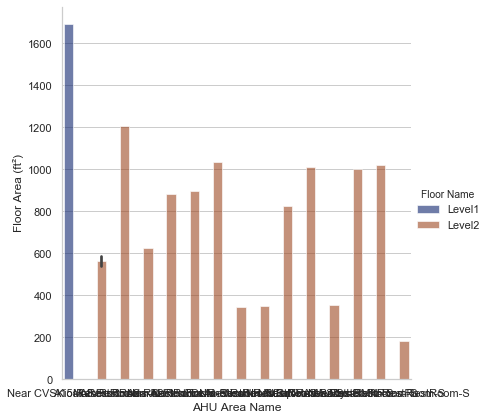

In [15]:
sns.set(style="whitegrid")
sns.catplot(
    data=df2, kind="bar",
    x="AHU Area Name", y="Floor Area (ft²)", hue="Floor Name",
    ci="sd", palette="dark", alpha=.6, height=6
)